# 1. Ridge Regression

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 4)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 12)
pd.set_option('display.float_format','{:20.2f}'.format)

plt.style.use('seaborn')

In [2]:
hitters = pd.read_csv('../datasets/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

cols_arange = [col for col in hitters if col !=hitters.columns[-2]] + [hitters.columns[-2]]
hitters = hitters[cols_arange]

In [3]:
# load data
hitters = pd.read_csv('../datasets/Hitters.csv', index_col=0).dropna()
hitters.index.name = 'Player'

cols_arange = [col for col in hitters if col !=hitters.columns[-2]] + [hitters.columns[-2]]
hitters = hitters[cols_arange]

hitters['League']= pd.get_dummies(hitters['League']).iloc[:,1]
hitters['Division']=pd.get_dummies(hitters['Division']).iloc[:,1]
hitters['NewLeague']=pd.get_dummies(hitters['NewLeague']).iloc[:,1]

X = hitters.iloc[:, 0:19]
y = hitters.iloc[:, 19]

In [4]:
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

grid = 10 ** np.linspace(3,-2,100)

ridge_model = Ridge(normalize=True) #X변수가 regression 하기 전에 normalize 된다.
coefs = []

for a in grid:
    ridge_model.set_params(alpha=a) # 여기서 alpha가 람다를 의미.
    ridge_model.fit(X,y)
    coefs.append(ridge_model.coef_)

In [5]:
grid[49]

3.351602650938841

In [6]:
coefs[49]

array([ 1.07678823e-01,  4.88686573e-01,  1.31795929e+00,  7.57860364e-01,
        7.30997082e-01,  1.00938460e+00,  2.78920666e+00,  9.30050774e-03,
        3.70396450e-02,  2.72350721e-01,  7.42215419e-02,  7.69501588e-02,
        6.91701737e-02,  6.81266963e+00, -3.36279212e+01,  7.70501917e-02,
        1.02554877e-02, -3.02798612e-01,  5.36069490e+00])

In [7]:
pd.Series(coefs[49], index = X.columns)

AtBat                       0.11
Hits                        0.49
HmRun                       1.32
Runs                        0.76
RBI                         0.73
Walks                       1.01
Years                       2.79
CAtBat                      0.01
CHits                       0.04
CHmRun                      0.27
CRuns                       0.07
CRBI                        0.08
CWalks                      0.07
League                      6.81
Division                  -33.63
PutOuts                     0.08
Assists                     0.01
Errors                     -0.30
NewLeague                   5.36
dtype: float64

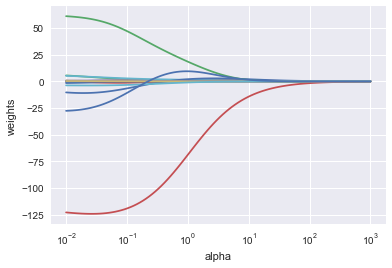

In [8]:
ax = plt.gca()
ax.plot(grid, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [10]:
#Validation set approach

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)

In [13]:
# lamda가 적절하게 4정도인 경우

ridge2 = Ridge(alpha=4, normalize=True)
ridge2_fit = ridge2.fit(X_train, y_train)
y_pred2 = ridge2_fit.predict(X_test)

print(pd.Series(ridge2_fit.coef_, index=X.columns))
print("MSE:", MSE(y_test, y_pred2))

AtBat                       0.10
Hits                        0.45
HmRun                       1.41
Runs                        0.66
RBI                         0.84
Walks                       1.01
Years                       2.78
CAtBat                      0.01
CHits                       0.03
CHmRun                      0.27
CRuns                       0.07
CRBI                        0.07
CWalks                      0.08
League                      4.24
Division                  -30.77
PutOuts                     0.10
Assists                    -0.00
Errors                      0.27
NewLeague                   4.12
dtype: float64
MSE: 106216.52238005561


In [14]:
# lamda가 매우 높은 경우
ridge3 = Ridge(alpha=1e10, normalize=True)
ridge3_fit = ridge3.fit(X_train, y_train)
y_pred3 = ridge3_fit.predict(X_test)

print(pd.Series(ridge3_fit.coef_, index=X.columns))
print("MSE:", MSE(y_test, y_pred3))

#전부다 0에 수렴하는 것을 알 수 있다.

AtBat                       0.00
Hits                        0.00
HmRun                       0.00
Runs                        0.00
RBI                         0.00
Walks                       0.00
Years                       0.00
CAtBat                      0.00
CHits                       0.00
CHmRun                      0.00
CRuns                       0.00
CRBI                        0.00
CWalks                      0.00
League                     -0.00
Division                   -0.00
PutOuts                     0.00
Assists                    -0.00
Errors                      0.00
NewLeague                  -0.00
dtype: float64
MSE: 172862.23580379886


In [15]:
# lamda가 0인 경우

ridge4 = Ridge(alpha=0, normalize=True)
ridge4_fit = ridge4.fit(X_train, y_train)
y_pred4 = ridge4_fit.predict(X_test)

print(pd.Series(ridge4_fit.coef_, index=X.columns))
print("MSE:", MSE(y_test, y_pred4))

AtBat                      -1.82
Hits                        4.26
HmRun                      -4.77
Runs                       -0.04
RBI                         3.98
Walks                       3.47
Years                       9.50
CAtBat                     -0.61
CHits                       2.17
CHmRun                      2.98
CRuns                       0.27
CRBI                       -0.60
CWalks                      0.17
League                    133.74
Division                 -113.74
PutOuts                     0.42
Assists                     0.46
Errors                     -6.02
NewLeague                 -81.93
dtype: float64
MSE: 116690.46856660453


In [16]:
# OLS인 경우

from sklearn.linear_model import LinearRegression as LR

OLS = LR(normalize=True)
OLS_fit = OLS.fit(X_train, y_train)
y_pred5 = OLS_fit.predict(X_test)

print(pd.Series(OLS_fit.coef_, index=X.columns))
print("MSE:", MSE(y_test, y_pred5))

# lamda 0일 때와 똑같다는 것을 알 수 있다.

AtBat                      -1.82
Hits                        4.26
HmRun                      -4.77
Runs                       -0.04
RBI                         3.98
Walks                       3.47
Years                       9.50
CAtBat                     -0.61
CHits                       2.17
CHmRun                      2.98
CRuns                       0.27
CRBI                       -0.60
CWalks                      0.17
League                    133.74
Division                 -113.74
PutOuts                     0.42
Assists                     0.46
Errors                     -6.02
NewLeague                 -81.93
dtype: float64
MSE: 116690.46856661087


In [20]:
##### cross validation ridge (10-fold)
ridge_cv = RidgeCV(alphas=grid, normalize=True, scoring = 'neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)
ridge_cv.alpha_

# 10-fold cv 했을 때 최적의 람다 값이 0.5857이다.

0.5857020818056667

In [22]:
# 위에서 나온 최적 람다 값으로 ridge regression 해보자.

ridge6 = Ridge(alpha=ridge_cv.alpha_, normalize=True)
ridge6.fit(X_train, y_train)
y_pred6 = ridge6.predict(X_test)

print(pd.Series(ridge6.coef_, index=X.columns))
print("MSE:", MSE(y_test, y_pred6))

#위에서 나온 애들보다 MSE값이 제일 작다는 것을 알 수 있다.

AtBat                      -0.01
Hits                        0.86
HmRun                      -0.26
Runs                        0.72
RBI                         1.31
Walks                       2.08
Years                       1.24
CAtBat                      0.01
CHits                       0.05
CHmRun                      0.51
CRuns                       0.11
CRBI                        0.13
CWalks                      0.10
League                     18.75
Division                  -91.61
PutOuts                     0.28
Assists                    -0.02
Errors                     -0.30
NewLeague                   9.99
dtype: float64
MSE: 99805.36301929558


## 2. Lasso

In [23]:
from sklearn.preprocessing import scale

grid = 10 ** np.linspace(3,-2,100)

lasso_model = Lasso(normalize=True, max_iter=10000) # max_iter 설정 안 해주면 convergence warning 나올 수도 있다.
coefs = []

for a in grid:
    lasso_model.set_params(alpha=a)
    lasso_model.fit(scale(X_train), y_train) # lasso에 넣기 전에 scaling 해줘야 함.
    coefs.append(lasso_model.coef_)

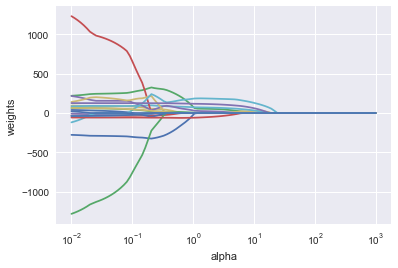

In [24]:
ax = plt.gca()
ax.plot(grid, coefs)
ax.set_xscale('log')

plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights');

In [25]:
# Lasso가 0인 경우도 마찬가지로 OLS와 같다.

lasso2 = Lasso(alpha=0, normalize=True, max_iter=10000)
lasso2.fit(X_train, y_train)
y_pred2 = lasso2.predict(X_test)

print(pd.Series(lasso2.coef_, index=X.columns))
print("MSE:", MSE(y_test, y_pred2))

AtBat                      -1.82
Hits                        4.26
HmRun                      -4.77
Runs                       -0.04
RBI                         3.98
Walks                       3.47
Years                       9.50
CAtBat                     -0.61
CHits                       2.17
CHmRun                      2.98
CRuns                       0.27
CRBI                       -0.60
CWalks                      0.17
League                    133.74
Division                 -113.74
PutOuts                     0.42
Assists                     0.46
Errors                     -6.02
NewLeague                 -81.93
dtype: float64
MSE: 116690.43632170075


C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5925539.461312228, tolerance: 3050.401923222197
  positive)


In [26]:
# cross-validation 10-fold
lasso_cv = LassoCV(alphas=grid, max_iter=100000, normalize=True, cv=10)
lasso_cv.fit(X_train, y_train)
lasso_cv.alpha_

2.364489412645407

In [27]:
lasso3 = Lasso(alpha=lasso_cv.alpha_, normalize=True, max_iter=10000)
lasso3.fit(X_train, y_train)
y_pred3 = lasso3.predict(X_test)

print(pd.Series(lasso3.coef_, index=X.columns))
print("MSE:", MSE(y_test, y_pred3))

AtBat                       0.00
Hits                        1.09
HmRun                       0.00
Runs                        0.00
RBI                         0.00
Walks                       2.91
Years                       0.00
CAtBat                      0.00
CHits                       0.00
CHmRun                      0.22
CRuns                       0.00
CRBI                        0.51
CWalks                      0.00
League                      0.00
Division                  -89.91
PutOuts                     0.37
Assists                    -0.00
Errors                     -0.00
NewLeague                   0.00
dtype: float64
MSE: 104933.7532671472
